https://drive.google.com/file/d/1G1GboGkCNj4ijWb9d3NblEuguoqWrFKa/view?usp=sharing

https://www.kaggle.com/datasets/eiodelami/disease-outbreaks-in-nigeria-datasets

1. Скачиваем датасет

In [ ]:
! gdown --id 1G1GboGkCNj4ijWb9d3NblEuguoqWrFKa


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(


2. Разархивировать файл

In [ ]:
! unzip /content/Diseasedatasets.zip

Archive:  /content/Diseasedatasets.zip
replace meningitis_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

3. Чтение данных

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.express as px
%matplotlib inline
%matplotlib notebook

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

import os
for dirname, _, filenames in os.walk('/content/meningitis_dataset.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv ('/content/meningitis_dataset.csv')

In [ ]:
df

,id,surname,firstname,middlename,gender,gender_male,gender_female,state,settlement,rural_settlement,...,NmA,NmC,NmW,health_status,alive,dead,report_outcome,unconfirmed,confirmed,null_serotype
0,1,Solade,Grace,Solape,Female,0,1,Rivers,Rural,1,...,0,0,0,alive,1,0,confirmed,0,1,1
1,2,Eneche,Kure,Balogun,Male,1,0,Ebonyi,Rural,1,...,0,0,1,Alive,1,0,Confirmed,1,0,1
2,3,Sanusi,Adaugo,Katerine,Female,0,1,Ogun,Urban,0,...,0,0,1,Dead,0,1,Not Confirmed,1,0,1
3,4,Sowore,Mooslemat,Ifedayo,Female,0,1,Ondo,Rural,1,...,0,0,1,Alive,1,0,Not Confirmed,1,0,1
4,5,Abdusalam,Yusuf,Okafor,Male,1,0,Oyo,Urban,0,...,0,0,1,Alive,1,0,Confirmed,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284479,288418,Mukthar,Alimat,Ajibewa,Female,0,1,Cross River,Rural,1,...,0,0,1,Dead,0,1,Confirmed,1,0,1
284480,288419,Akenzua,Deborah,Rofeeqat,Female,0,1,Kwara,Urban,0,...,0,0,1,Dead,0,1,Confirmed,1,0,1
284481,288420,Isa,Deborah,Tofunmi,Female,0,1,Katsina,Rural,1,...,0,0,1,Alive,1,0,Confirmed,0,1,1
284482,288421,Uba,Ismail,Akpabio,Male,1,0,Jigawa,Rural,1,...,0,0,1,Dead,0,1,Not Confirmed,1,0,1


Удаляем все лишнее параметры

4. Фильтрация данных

<Axes: >

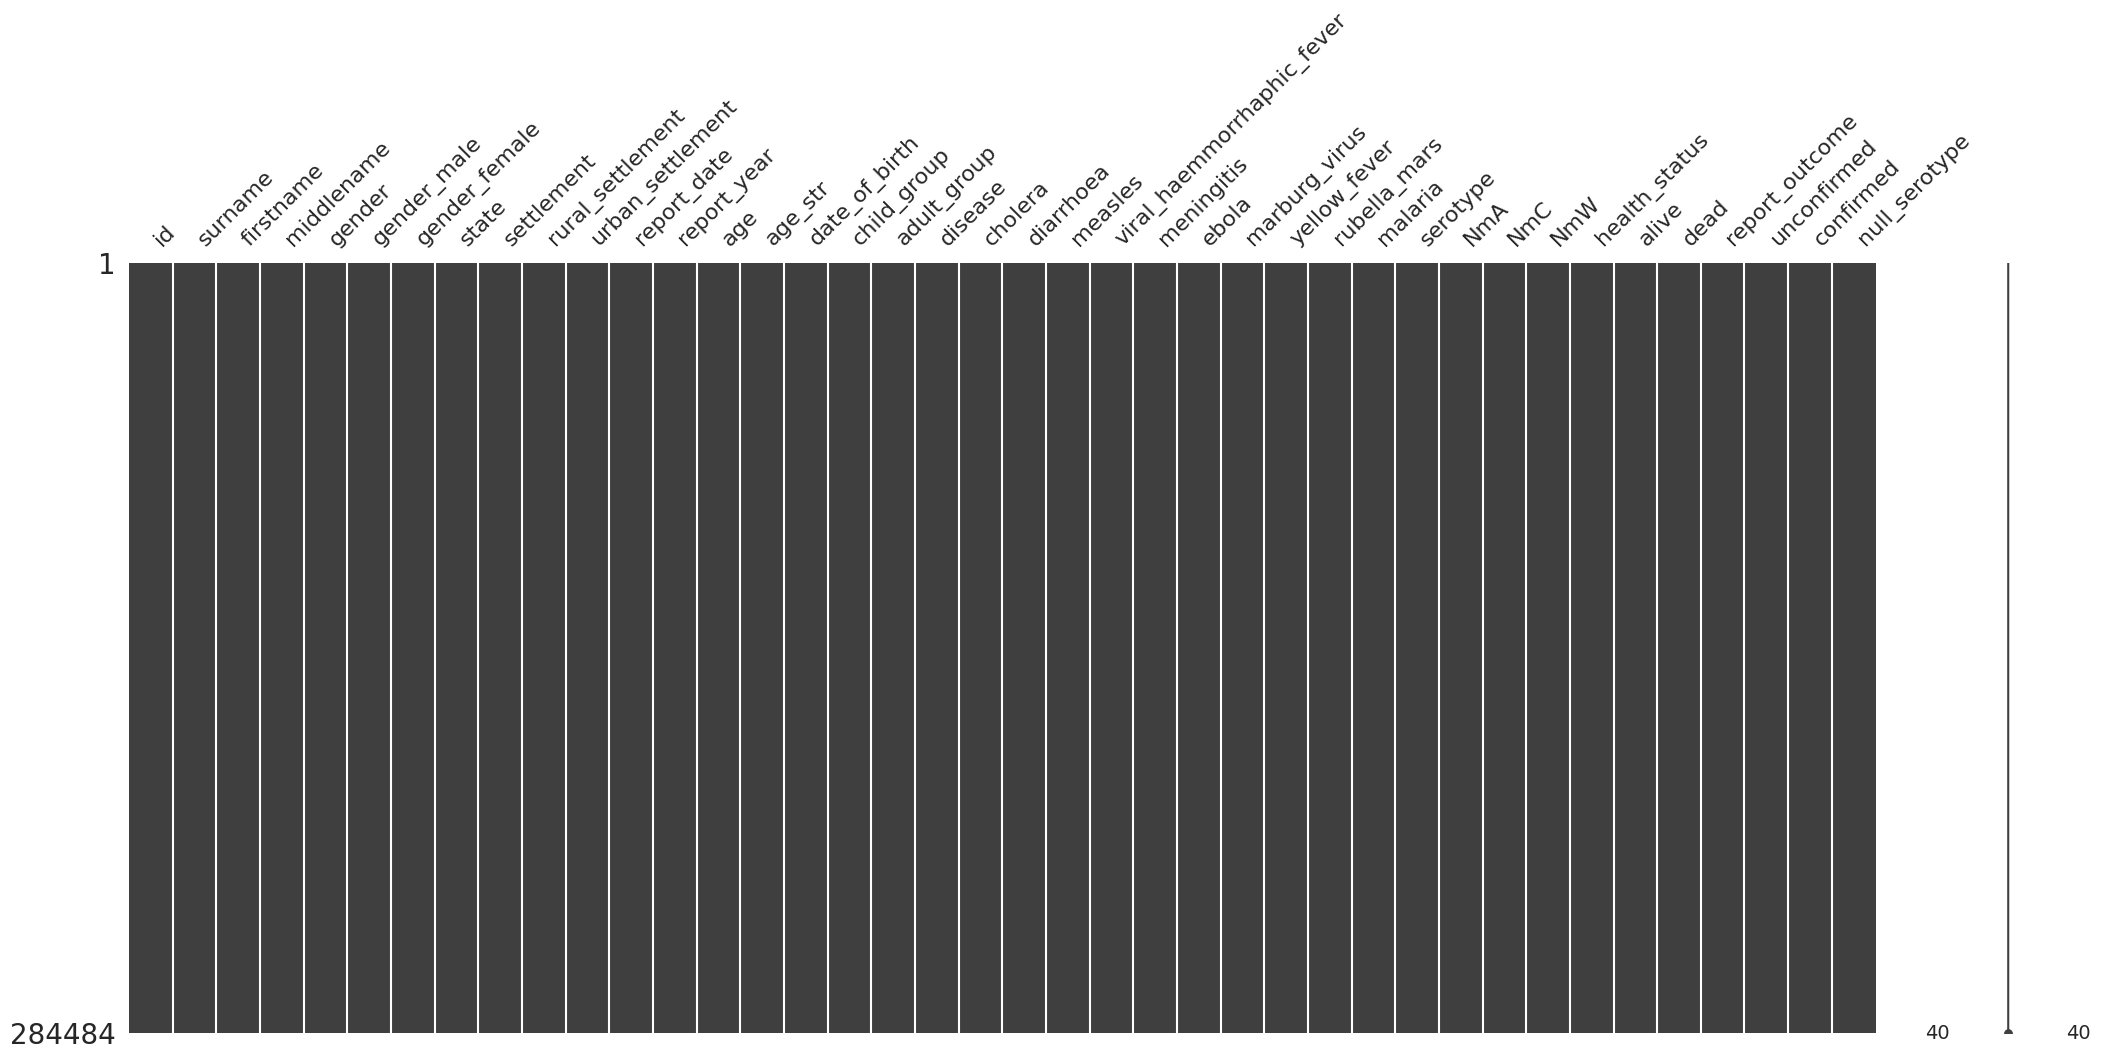

In [ ]:
%matplotlib inline
import missingno as msno
msno.matrix(df)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284484 entries, 0 to 284483
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   id                          284484 non-null  int64 
 1   surname                     284484 non-null  object
 2   firstname                   284484 non-null  object
 3   middlename                  284484 non-null  object
 4   gender                      284484 non-null  object
 5   gender_male                 284484 non-null  int64 
 6   gender_female               284484 non-null  int64 
 7   state                       284484 non-null  object
 8   settlement                  284484 non-null  object
 9   rural_settlement            284484 non-null  int64 
 10  urban_settlement            284484 non-null  int64 
 11  report_date                 284484 non-null  object
 12  report_year                 284484 non-null  int64 
 13  age                         2

In [ ]:


#df = pd.read_csv('/content/meningitis_dataset.csv')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

X = df.drop('state', axis=1)
y = df['state']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Random Forest': RandomForestRegressor(n_estimators=10, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42)
}
print(models)


{'Random Forest': RandomForestRegressor(n_estimators=10, random_state=42), 'Decision Tree': DecisionTreeRegressor(random_state=42), 'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42)}


In [ ]:
import time
for name, model in models.items():
    start_time = time.time()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    end_time = time.time()  # End time
    time_consumed = end_time - start_time

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    print(f'{name} Mean Squared Error:', mse)
    print(f'{name} Root Mean Squared Error:', rmse)
    print(f'{name} Mean Absolute Error:', mae)
    print(f'{name} Time Consumed for Training and Prediction: {time_consumed:.3f} seconds')

Random Forest Mean Squared Error: 126.2047281930506
Random Forest Root Mean Squared Error: 11.234087777521173
Random Forest Mean Absolute Error: 9.550268028191292
Random Forest Time Consumed for Training and Prediction: 56.643 seconds
Decision Tree Mean Squared Error: 233.0598274074204
Decision Tree Root Mean Squared Error: 15.266297108579423
Decision Tree Mean Absolute Error: 12.467212682566743
Decision Tree Time Consumed for Training and Prediction: 10.243 seconds
AdaBoost Mean Squared Error: 113.28623292126235
AdaBoost Root Mean Squared Error: 10.643600561899266
AdaBoost Mean Absolute Error: 9.195521293082226
AdaBoost Time Consumed for Training and Prediction: 7.728 seconds


Столько болезней содержится в датафрейме

In [ ]:
df.disease.value_counts()

,count
disease,
Cholera,28589
Diarrhoea,28550
Rubella Mars,28539
Malaria,28535
Measles,28471
Marburg Virus,28430
Yellow Fever,28428
Viral Haemmorrhaphic Fever,28401
Meningitis,28362


In [ ]:
data=df[['id', 'gender', 'state', 'settlement', 'report_year', 'age', 'disease', 'serotype',
         'health_status', 'report_outcome']]
data.head()

,id,gender,state,settlement,report_year,age,disease,serotype,health_status,report_outcome
0,1,Female,Rivers,Rural,2018,32,Cholera,null serotype,alive,confirmed
1,2,Male,Ebonyi,Rural,2017,32,Marburg Virus,Null,Alive,Confirmed
2,3,Female,Ogun,Urban,2012,24,Marburg Virus,Null,Dead,Not Confirmed
3,4,Female,Ondo,Rural,2010,63,Measles,Null,Alive,Not Confirmed
4,5,Male,Oyo,Urban,2017,9,Rubella Mars,Null,Alive,Confirmed


In [ ]:
data1=data.loc[data['health_status']== 'Alive']
data1.gender.value_counts()

,count
gender,
Female,73461
Male,68733


In [ ]:
data1=data.loc[data['health_status']== 'Dead']
data1.gender.value_counts()

,count
gender,
Female,73810
Male,68479


In [ ]:
df.columns

Index(['id', 'surname', 'firstname', 'middlename', 'gender', 'gender_male',
       'gender_female', 'state', 'settlement', 'rural_settlement',
       'urban_settlement', 'report_date', 'report_year', 'age', 'age_str',
       'date_of_birth', 'child_group', 'adult_group', 'disease', 'cholera',
       'diarrhoea', 'measles', 'viral_haemmorrhaphic_fever', 'meningitis',
       'ebola', 'marburg_virus', 'yellow_fever', 'rubella_mars', 'malaria',
       'serotype', 'NmA', 'NmC', 'NmW', 'health_status', 'alive', 'dead',
       'report_outcome', 'unconfirmed', 'confirmed', 'null_serotype'],
      dtype='object')

In [ ]:
data_serotype= data.groupby(['serotype', 'disease' ])['id'].count().reset_index(name='Number of Patients').sort_values(by= 'Number of Patients', ascending= False)
data_serotype

,serotype,disease,Number of Patients
3,Null,Cholera,28588
4,Null,Diarrhoea,28550
9,Null,Rubella Mars,28539
6,Null,Malaria,28535
8,Null,Measles,28471
7,Null,Marburg Virus,28430
11,Null,Yellow Fever,28428
10,Null,Viral Haemmorrhaphic Fever,28401
5,Null,Ebola,28179
2,Neisseria meningitidis group W (NmW),Meningitis,14194


Выявлен минингит

In [ ]:
px.bar(data_serotype, x='serotype' , y='Number of Patients', color= 'disease' )

Вывод:
из визуализации данных мы можем сделать вывод, что заболевания могут возникать независимо от штата, населенного пункта, пола. Только возраст является характеристикой, которая может повлиять на состояние здоровья.

In [ ]:
data.health_status.value_counts()

,count
health_status,
Dead,142289
Alive,142194
alive,1


In [ ]:
data.report_outcome.value_counts()

,count
report_outcome,
Not Confirmed,142746
Confirmed,141737
confirmed,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def Labelencoder_feature(x):
    le=LabelEncoder()
    x=le.fit_transform(x)
    return x
data2=data.drop(columns=['id'])
data2=data2.apply(Labelencoder_feature)
data2.head()

,gender,state,settlement,report_year,age,disease,serotype,health_status,report_outcome
0,0,32,0,9,32,0,4,2,2
1,1,10,0,8,32,4,3,0,0
2,0,27,1,3,24,4,3,1,1
3,0,28,0,1,63,5,3,0,1
4,1,30,1,8,9,7,3,0,0


<Axes: >

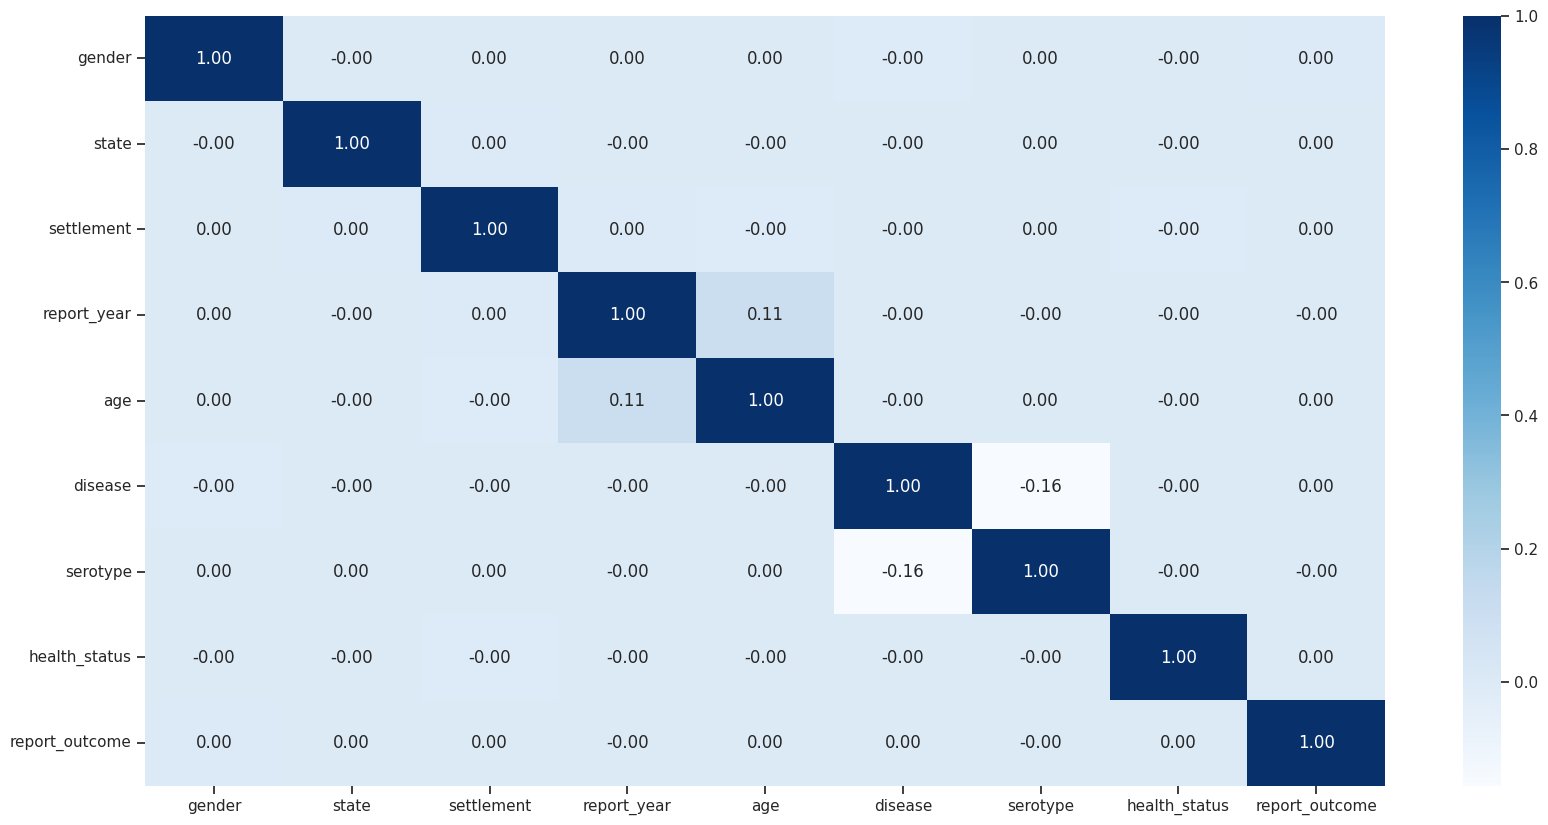

In [ ]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(data2.corr(), annot = True, fmt = '.2f', cmap = 'Blues', )